In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("/home/hemanth/Documents/XGBoosting/BankChurners.csv")

In [3]:
data.head(2)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [4]:
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
data.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

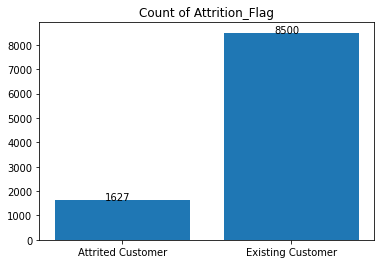

In [7]:
grouped1 = pd.DataFrame(data.groupby(['Attrition_Flag'])['Gender'].count()).reset_index()

label = list(grouped1['Gender'])
plt.bar(grouped1['Attrition_Flag'], grouped1['Gender'])
for i in range(len(grouped1)):
    plt.text(x = grouped1.index[i]-0.1 , y = grouped1['Gender'][i]+0.3, s = label[i], size = 10)

plt.xticks(np.arange(0, 2, 1))
plt.title('Count of Attrition_Flag')
plt.show()

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density and distribution of Customer_Age for Attrition_Flag')

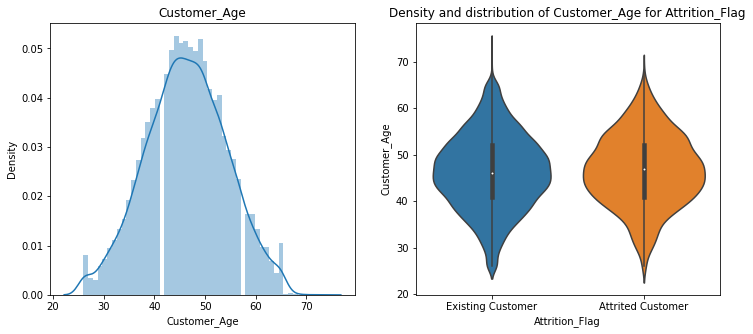

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["Customer_Age"], bins=50,ax=axes[0]).set_title("Customer_Age")
viz_1=sns.violinplot(data=data, x='Attrition_Flag', y='Customer_Age', ax=axes[1])
viz_1.set_title('Density and distribution of Customer_Age for Attrition_Flag')



,Gender,Attrition_Flag,CLIENTNUM
0,F,Attrited Customer,930
1,F,Existing Customer,4428
2,M,Attrited Customer,697
3,M,Existing Customer,4072


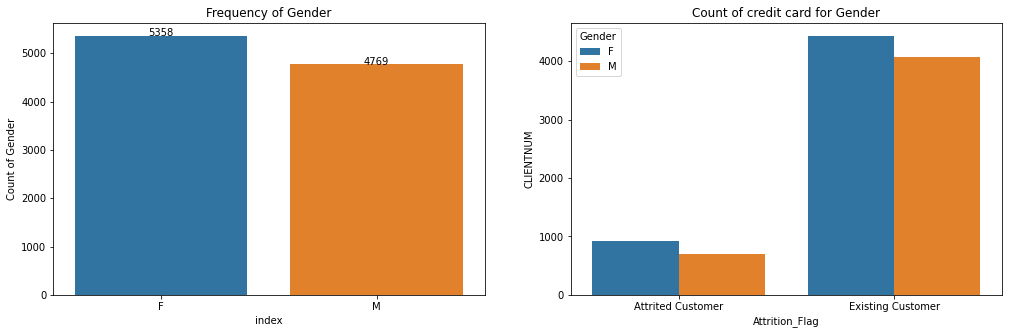

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
grouped = pd.DataFrame({'Attrition_Flag': sorted(data['Attrition_Flag'].unique()),
                        'Count of Gender': data['Gender'].value_counts()})
grouped = grouped.reset_index()

ax = sns.barplot(x=grouped.iloc[:,0], y=grouped.iloc[:,2],ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Frequency of Gender")
for index, row in grouped.iterrows():
    ax.text(index,row[2], round(row[2],3), color='black', ha="center")

grouped = pd.DataFrame(data.groupby(['Gender','Attrition_Flag'])['CLIENTNUM'].count()).reset_index()

ax1 = sns.barplot(x=grouped.iloc[:,1], y=grouped.iloc[:,2], hue=grouped.iloc[:,0], ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title('Count of credit card for Gender')

grouped

,Dependent_count,Attrition_Flag,CLIENTNUM
0,0,Attrited Customer,135
1,0,Existing Customer,769
2,1,Attrited Customer,269
3,1,Existing Customer,1569
4,2,Attrited Customer,417
5,2,Existing Customer,2238
6,3,Attrited Customer,482
7,3,Existing Customer,2250
8,4,Attrited Customer,260
9,4,Existing Customer,1314


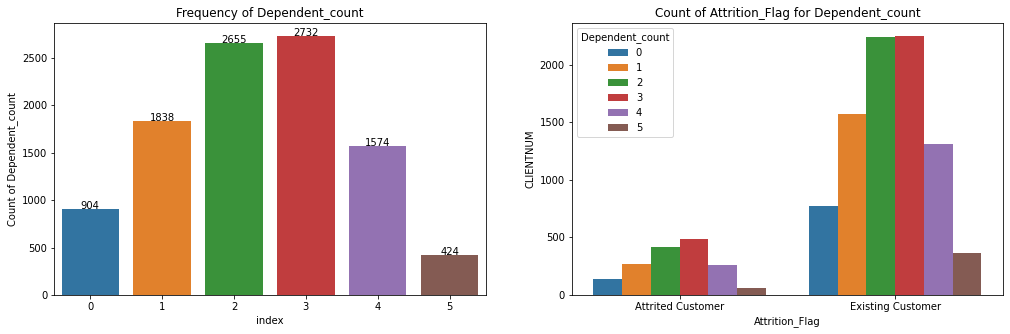

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
grouped = pd.DataFrame({'Count of Dependent_count': data['Dependent_count'].value_counts()})
grouped = grouped.reset_index()

ax = sns.barplot(x=grouped.iloc[:,0], y=grouped.iloc[:,1],ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Frequency of Dependent_count")
for index, row in grouped.iterrows():
    ax.text(row[0],row[1], round(row[1],3), color='black', ha="center")

grouped = pd.DataFrame(data.groupby(['Dependent_count','Attrition_Flag'])['CLIENTNUM'].count()).reset_index()
grouped
ax1 = sns.barplot(x=grouped.iloc[:,1], y=grouped.iloc[:,2], hue=grouped.iloc[:,0], ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title('Count of Attrition_Flag for Dependent_count')

grouped


,Education_Level,Attrition_Flag,CLIENTNUM
0,College,Attrited Customer,154
1,College,Existing Customer,859
2,Doctorate,Attrited Customer,95
3,Doctorate,Existing Customer,356
4,Graduate,Attrited Customer,487
5,Graduate,Existing Customer,2641
6,High School,Attrited Customer,306
7,High School,Existing Customer,1707
8,Post-Graduate,Attrited Customer,92
9,Post-Graduate,Existing Customer,424


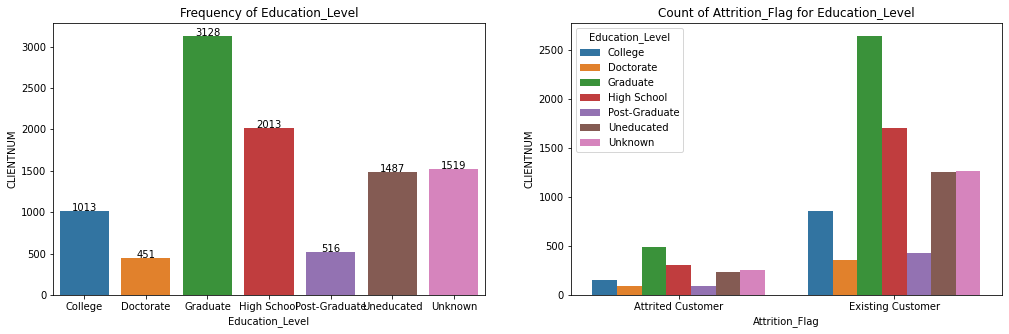

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
grouped = pd.DataFrame(data.groupby(['Education_Level'])['CLIENTNUM'].count()).reset_index()

ax = sns.barplot(x=grouped.iloc[:,0], y=grouped.iloc[:,1],ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Frequency of Education_Level")
for index, row in grouped.iterrows():
    ax.text(index,row[1], round(row[1],3), color='black', ha="center")

grouped = pd.DataFrame(data.groupby(['Education_Level','Attrition_Flag'])['CLIENTNUM'].count()).reset_index()
grouped
ax1 = sns.barplot(x=grouped.iloc[:,1], y=grouped.iloc[:,2], hue=grouped.iloc[:,0], ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title('Count of Attrition_Flag for Education_Level')

grouped

,Marital_Status,Attrition_Flag,CLIENTNUM
0,Divorced,Attrited Customer,121
1,Divorced,Existing Customer,627
2,Married,Attrited Customer,709
3,Married,Existing Customer,3978
4,Single,Attrited Customer,668
5,Single,Existing Customer,3275
6,Unknown,Attrited Customer,129
7,Unknown,Existing Customer,620


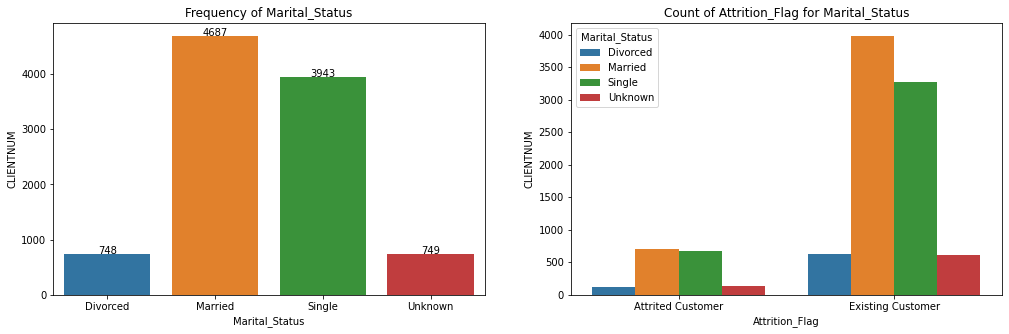

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
grouped = pd.DataFrame(data.groupby(['Marital_Status'])['CLIENTNUM'].count())
grouped = grouped.reset_index()

ax = sns.barplot(x=grouped.iloc[:,0], y=grouped.iloc[:,1],ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Frequency of Marital_Status")
for index, row in grouped.iterrows():
    ax.text(index,row[1], round(row[1],3), color='black', ha="center")

grouped = pd.DataFrame(data.groupby(['Marital_Status','Attrition_Flag'])['CLIENTNUM'].count()).reset_index()
grouped
ax1 = sns.barplot(x=grouped.iloc[:,1], y=grouped.iloc[:,2], hue=grouped.iloc[:,0], ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title('Count of Attrition_Flag for Marital_Status')

grouped


,Income_Category,Attrition_Flag,CLIENTNUM
0,$120K +,Attrited Customer,126
1,$120K +,Existing Customer,601
2,$40K - $60K,Attrited Customer,271
3,$40K - $60K,Existing Customer,1519
4,$60K - $80K,Attrited Customer,189
5,$60K - $80K,Existing Customer,1213
6,$80K - $120K,Attrited Customer,242
7,$80K - $120K,Existing Customer,1293
8,Less than $40K,Attrited Customer,612
9,Less than $40K,Existing Customer,2949


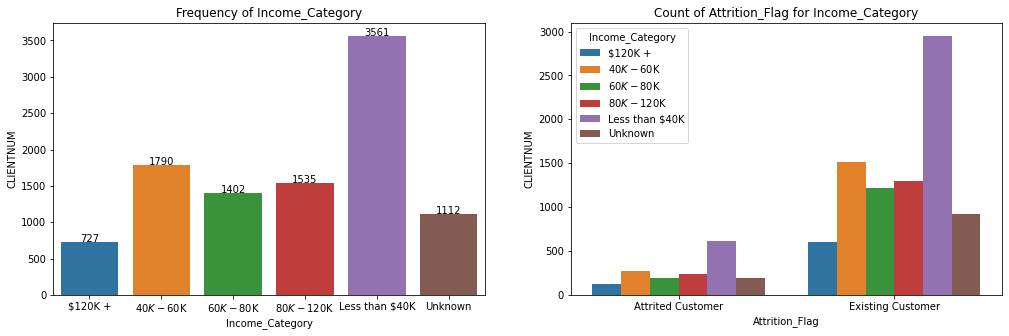

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
grouped = pd.DataFrame(data.groupby(['Income_Category'])['CLIENTNUM'].count())
grouped = grouped.reset_index()

ax = sns.barplot(x=grouped.iloc[:,0], y=grouped.iloc[:,1],ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Frequency of Income_Category")
for index, row in grouped.iterrows():
    ax.text(index,row[1], round(row[1],3), color='black', ha="center")

grouped = pd.DataFrame(data.groupby(['Income_Category','Attrition_Flag'])['CLIENTNUM'].count()).reset_index()
grouped
ax1 = sns.barplot(x=grouped.iloc[:,1], y=grouped.iloc[:,2], hue=grouped.iloc[:,0], ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title('Count of Attrition_Flag for Income_Category')

grouped

,Card_Category,Attrition_Flag,CLIENTNUM
0,Blue,Attrited Customer,1519
1,Blue,Existing Customer,7917
2,Gold,Attrited Customer,21
3,Gold,Existing Customer,95
4,Platinum,Attrited Customer,5
5,Platinum,Existing Customer,15
6,Silver,Attrited Customer,82
7,Silver,Existing Customer,473


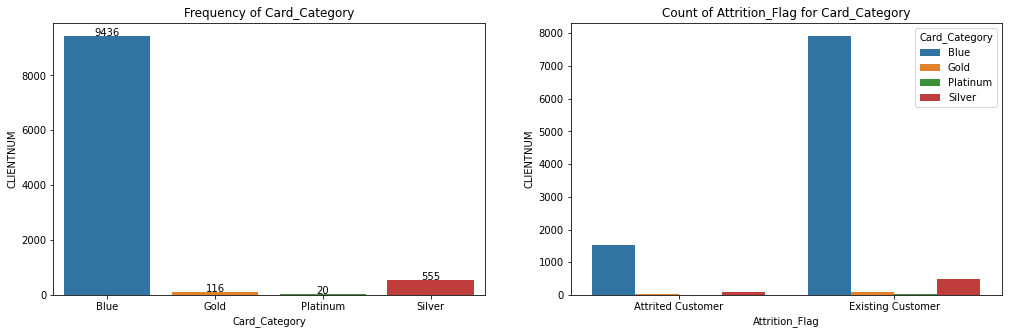

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
grouped = pd.DataFrame(data.groupby(['Card_Category'])['CLIENTNUM'].count())
grouped = grouped.reset_index()

ax = sns.barplot(x=grouped.iloc[:,0], y=grouped.iloc[:,1],ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Frequency of Card_Category")
for index, row in grouped.iterrows():
    ax.text(index,row[1], round(row[1],3), color='black', ha="center")

grouped = pd.DataFrame(data.groupby(['Card_Category','Attrition_Flag'])['CLIENTNUM'].count()).reset_index()
grouped
ax1 = sns.barplot(x=grouped.iloc[:,1], y=grouped.iloc[:,2], hue=grouped.iloc[:,0], ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title('Count of Attrition_Flag for Card_Category')

grouped

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density and distribution of Months_on_book for Attrition_Flag')

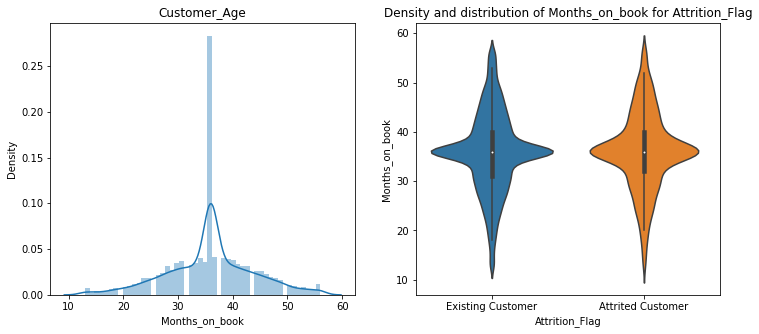

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["Months_on_book"], bins=50,ax=axes[0]).set_title("Customer_Age")
viz_1=sns.violinplot(data=data, x='Attrition_Flag', y='Months_on_book', ax=axes[1])
viz_1.set_title('Density and distribution of Months_on_book for Attrition_Flag')



,Total_Relationship_Count,Attrition_Flag,CLIENTNUM
0,1,Attrited Customer,233
1,1,Existing Customer,677
2,2,Attrited Customer,346
3,2,Existing Customer,897
4,3,Attrited Customer,400
5,3,Existing Customer,1905
6,4,Attrited Customer,225
7,4,Existing Customer,1687
8,5,Attrited Customer,227
9,5,Existing Customer,1664


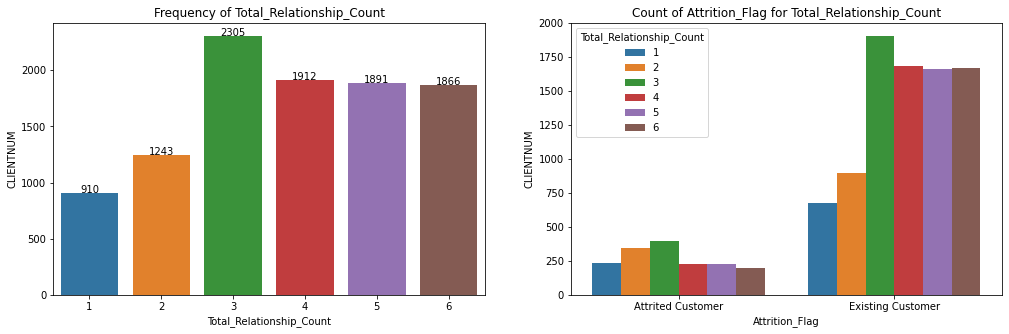

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
grouped = pd.DataFrame(data.groupby(['Total_Relationship_Count'])['CLIENTNUM'].count())
grouped = grouped.reset_index()

ax = sns.barplot(x=grouped.iloc[:,0], y=grouped.iloc[:,1],ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Frequency of Total_Relationship_Count")
for index, row in grouped.iterrows():
    ax.text(index,row[1], round(row[1],3), color='black', ha="center")

grouped = pd.DataFrame(data.groupby(['Total_Relationship_Count','Attrition_Flag'])['CLIENTNUM'].count()).reset_index()
grouped
ax1 = sns.barplot(x=grouped.iloc[:,1], y=grouped.iloc[:,2], hue=grouped.iloc[:,0], ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title('Count of Attrition_Flag for Total_Relationship_Count')

grouped


,Months_Inactive_12_mon,Attrition_Flag,CLIENTNUM
0,0,Attrited Customer,15
1,0,Existing Customer,14
2,1,Attrited Customer,100
3,1,Existing Customer,2133
4,2,Attrited Customer,505
5,2,Existing Customer,2777
6,3,Attrited Customer,826
7,3,Existing Customer,3020
8,4,Attrited Customer,130
9,4,Existing Customer,305


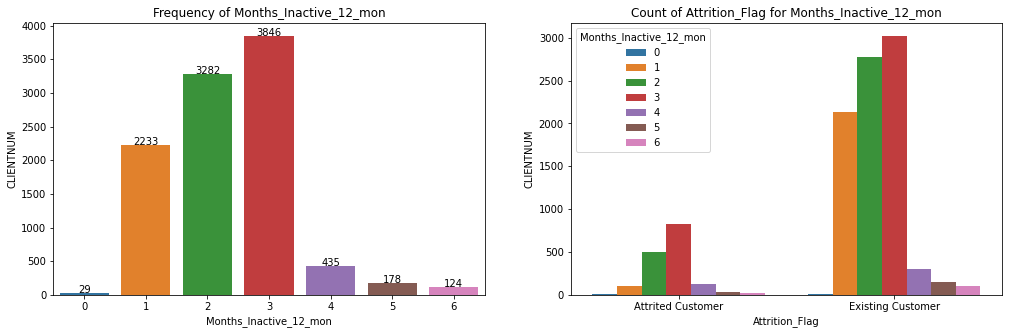

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
grouped = pd.DataFrame(data.groupby(['Months_Inactive_12_mon'])['CLIENTNUM'].count())
grouped = grouped.reset_index()

ax = sns.barplot(x=grouped.iloc[:,0], y=grouped.iloc[:,1],ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Frequency of Months_Inactive_12_mon")
for index, row in grouped.iterrows():
    ax.text(index,row[1], round(row[1],3), color='black', ha="center")

grouped = pd.DataFrame(data.groupby(['Months_Inactive_12_mon','Attrition_Flag'])['CLIENTNUM'].count()).reset_index()
grouped
ax1 = sns.barplot(x=grouped.iloc[:,1], y=grouped.iloc[:,2], hue=grouped.iloc[:,0], ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title('Count of Attrition_Flag for Months_Inactive_12_mon')

grouped


,Contacts_Count_12_mon,Attrition_Flag,CLIENTNUM
0,0,Attrited Customer,7
1,0,Existing Customer,392
2,1,Attrited Customer,108
3,1,Existing Customer,1391
4,2,Attrited Customer,403
5,2,Existing Customer,2824
6,3,Attrited Customer,681
7,3,Existing Customer,2699
8,4,Attrited Customer,315
9,4,Existing Customer,1077


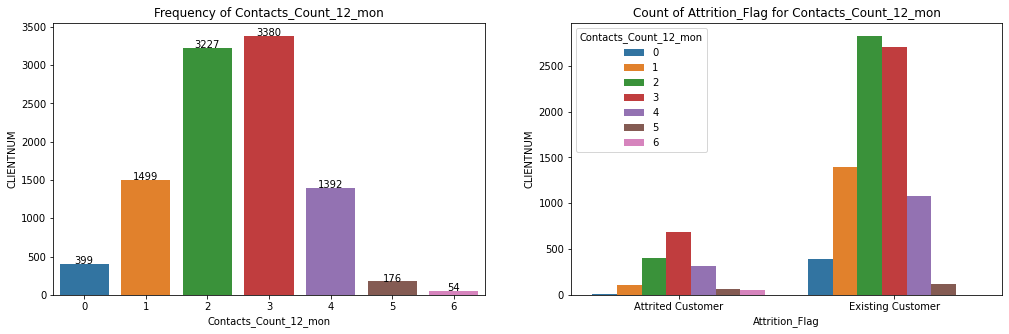

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17,5))
grouped = pd.DataFrame(data.groupby(['Contacts_Count_12_mon'])['CLIENTNUM'].count())
grouped = grouped.reset_index()

ax = sns.barplot(x=grouped.iloc[:,0], y=grouped.iloc[:,1],ax=axes[0])
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Frequency of Contacts_Count_12_mon")
for index, row in grouped.iterrows():
    ax.text(index,row[1], round(row[1],3), color='black', ha="center")

grouped = pd.DataFrame(data.groupby(['Contacts_Count_12_mon','Attrition_Flag'])['CLIENTNUM'].count()).reset_index()
grouped
ax1 = sns.barplot(x=grouped.iloc[:,1], y=grouped.iloc[:,2], hue=grouped.iloc[:,0], ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels())
ax1.set_title('Count of Attrition_Flag for Contacts_Count_12_mon')

grouped

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density and distribution of Credit_Limit for Attrition_Flag')

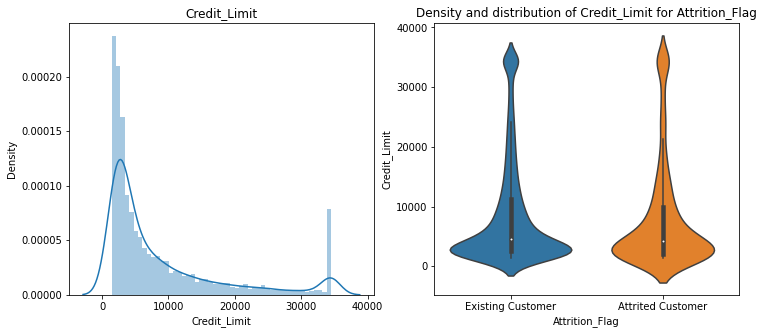

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["Credit_Limit"], bins=50,ax=axes[0]).set_title("Credit_Limit")
viz_1=sns.violinplot(data=data, x='Attrition_Flag', y='Credit_Limit', ax=axes[1])
viz_1.set_title('Density and distribution of Credit_Limit for Attrition_Flag')

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density and distribution of Total_Revolving_Bal for Attrition_Flag')

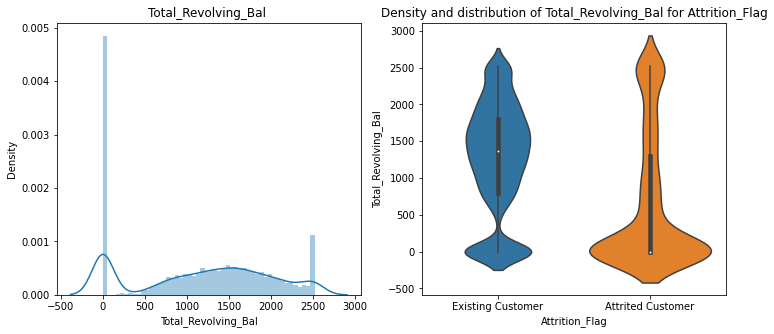

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["Total_Revolving_Bal"], bins=50,ax=axes[0]).set_title("Total_Revolving_Bal ")
viz_1=sns.violinplot(data=data, x='Attrition_Flag', y='Total_Revolving_Bal', ax=axes[1])
viz_1.set_title('Density and distribution of Total_Revolving_Bal for Attrition_Flag')



/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density and distribution of Avg_Open_To_Buy for Attrition_Flag')

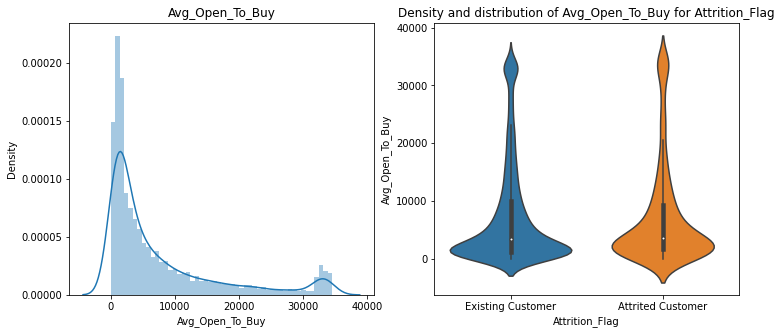

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["Avg_Open_To_Buy"], bins=50,ax=axes[0]).set_title("Avg_Open_To_Buy")
viz_1=sns.violinplot(data=data, x='Attrition_Flag', y='Avg_Open_To_Buy', ax=axes[1])
viz_1.set_title('Density and distribution of Avg_Open_To_Buy for Attrition_Flag')



/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density and distribution of Total_Amt_Chng_Q4_Q1 for Attrition_Flag')

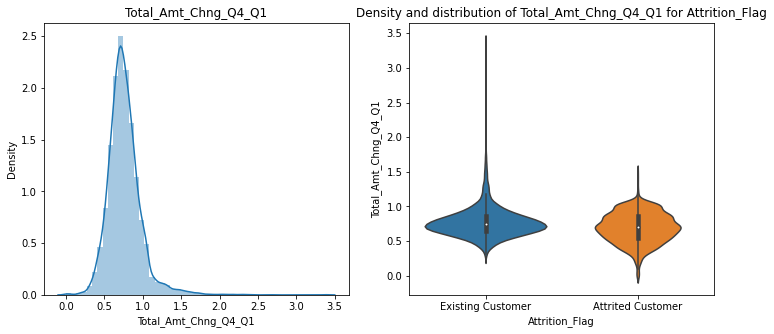

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["Total_Amt_Chng_Q4_Q1"], bins=50,ax=axes[0]).set_title("Total_Amt_Chng_Q4_Q1")
viz_1=sns.violinplot(data=data, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1', ax=axes[1])
viz_1.set_title('Density and distribution of Total_Amt_Chng_Q4_Q1 for Attrition_Flag')



/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density and distribution of Total_Trans_Amt for Attrition_Flag')

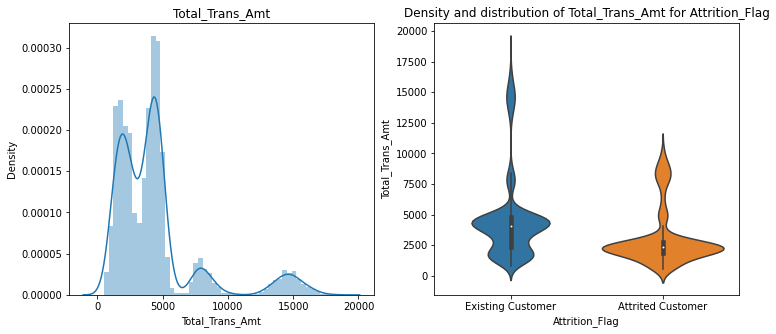

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["Total_Trans_Amt"], bins=50,ax=axes[0]).set_title("Total_Trans_Amt")
viz_1=sns.violinplot(data=data, x='Attrition_Flag', y='Total_Trans_Amt', ax=axes[1])
viz_1.set_title('Density and distribution of Total_Trans_Amt for Attrition_Flag')

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density and distribution of Total_Trans_Ct for Attrition_Flag')

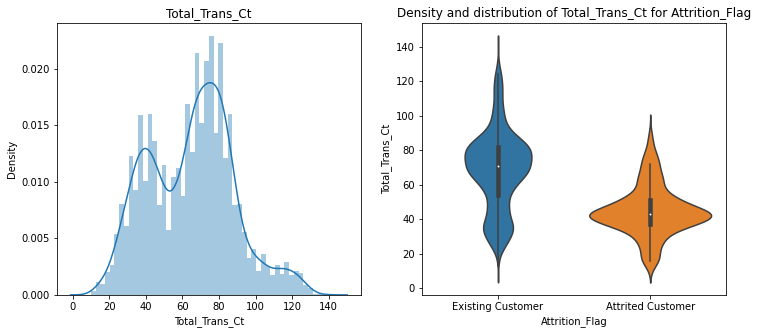

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["Total_Trans_Ct"], bins=50,ax=axes[0]).set_title("Total_Trans_Ct")
viz_1=sns.violinplot(data=data, x='Attrition_Flag', y='Total_Trans_Ct', ax=axes[1])
viz_1.set_title('Density and distribution of Total_Trans_Ct for Attrition_Flag')

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density and distribution of Total_Ct_Chng_Q4_Q1 for Attrition_Flag')

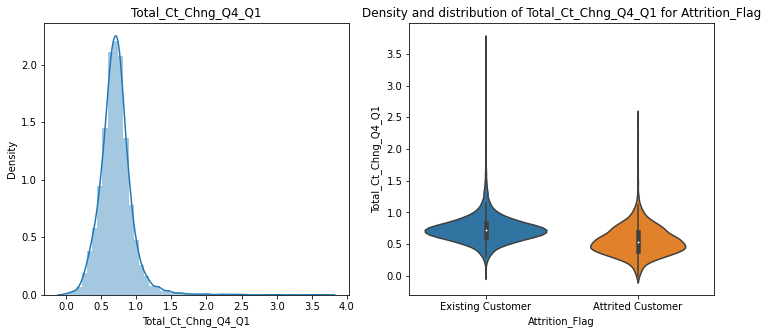

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["Total_Ct_Chng_Q4_Q1"], bins=50,ax=axes[0]).set_title("Total_Ct_Chng_Q4_Q1")
viz_1=sns.violinplot(data=data, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', ax=axes[1])
viz_1.set_title('Density and distribution of Total_Ct_Chng_Q4_Q1 for Attrition_Flag')



/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density and distribution of Avg_Utilization_Ratio for Attrition_Flag')

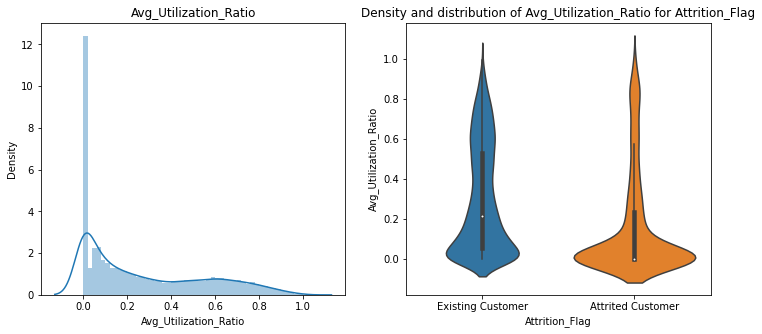

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

sns.distplot( data["Avg_Utilization_Ratio"], bins=50,ax=axes[0]).set_title("Avg_Utilization_Ratio")
viz_1=sns.violinplot(data=data, x='Attrition_Flag', y='Avg_Utilization_Ratio', ax=axes[1])
viz_1.set_title('Density and distribution of Avg_Utilization_Ratio for Attrition_Flag')

In [28]:
pd.DataFrame(list(data.columns)) 

dataset = data.iloc[:,[2,9,10,11,12,13,14,16,17,18,19,20,1]]

dataset.iloc[:,-1] = dataset.iloc[:,-1].replace("Attrited Customer", 1).replace("Existing Customer", 0)



/home/hemanth/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:>

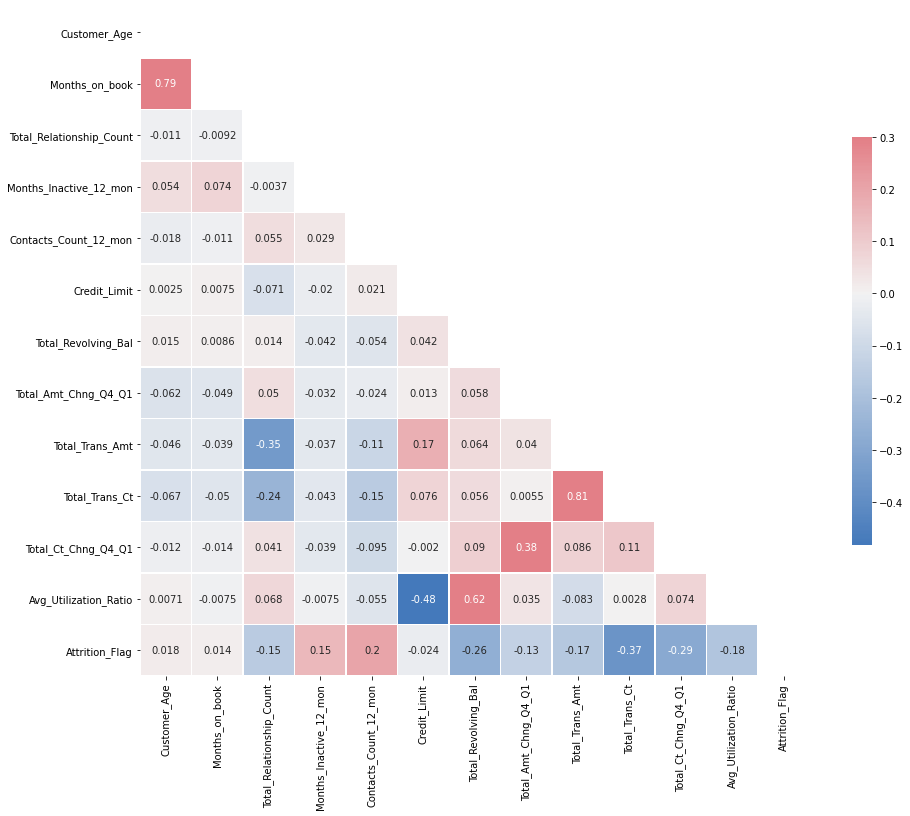

In [29]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
dataset = dataset.drop(['Months_on_book','Total_Trans_Amt','Total_Amt_Chng_Q4_Q1','Avg_Utilization_Ratio'], axis = 1)

<AxesSubplot:>

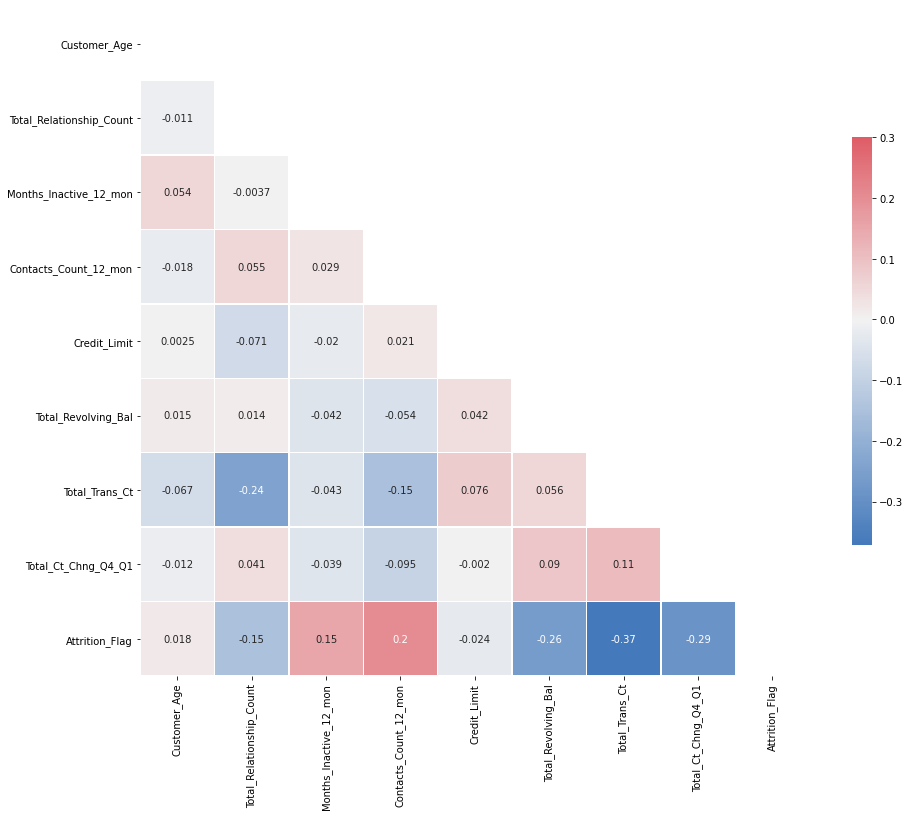

In [31]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, vmax=.3, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.6, random_state = 1)



In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

# Fitting Random Forest Classifier to the dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, random_state = 0)
classifier.fit(X_train, y_train)
# Predicting result for training set and validation set
predict_train_rf = classifier.predict(X_train)
predict_val_rf = classifier.predict(X_val)

from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, predict_train_rf)
cm_val = confusion_matrix(y_val, predict_val_rf)

# Model Performance 
from sklearn.metrics import accuracy_score, recall_score, precision_score
print("Train Score : ", accuracy_score(y_train, predict_train_rf) *  100) 
print("Train Recall : ", recall_score(y_train, predict_train_rf) *  100) 
print("Train Precision : ", precision_score(y_train, predict_train_rf) *  100) 
print("Val Score : ", accuracy_score(y_val, predict_val_rf) *  100) 
print("Val Recall : ", recall_score(y_val, predict_val_rf) *  100) 
print("Val Precision : ", precision_score(y_val, predict_val_rf) *  100) 

Train Score :  100.0
Train Recall :  100.0
Train Precision :  100.0
Val Score :  92.46338653941089
Val Recall :  64.74226804123711
Val Precision :  84.40860215053763


In [34]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
predict_train_xgb = classifier.predict(X_train)
predict_val_xgb = classifier.predict(X_val)

# Model Performance 
print("Train Score : ", accuracy_score(y_train, predict_train_xgb) *  100) 
print("Train Recall : ", recall_score(y_train, predict_train_xgb) *  100) 
print("Train Precision : ", precision_score(y_train, predict_train_xgb) *  100) 
print("Val Score : ", accuracy_score(y_val, predict_val_xgb) *  100) 
print("Val Recall : ", recall_score(y_val, predict_val_xgb) *  100) 
print("Val Precision : ", precision_score(y_val, predict_val_xgb) *  100) 

Train Score :  100.0
Train Recall :  100.0
Train Precision :  100.0
Val Score :  92.77604080961001
Val Recall :  70.41237113402062
Val Precision :  81.79640718562874


In [35]:
from sklearn.utils import resample
print('Number of class 1 samples before:',
     X_train[y_train==1].shape[0])

X_train_upsampled, y_train_upsampled = resample(X_train[y_train == 1], 
                                                y_train[y_train == 1],
                                                replace=True,
                                                n_samples=X_train[y_train == 0].shape[0],
                                                random_state=123)

print('Number of class 1 samples after:',
     X_train_upsampled.shape[0])

X_train_bal = np.vstack((X_train[y_train==0], X_train_upsampled))
y_train_bal = np.hstack((y_train[y_train==0], y_train_upsampled))

Number of class 1 samples before: 657
Number of class 1 samples after: 3393


In [36]:


# Fitting Random Forest Classifier to the dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, random_state = 0)
classifier.fit(X_train_bal, y_train_bal)
# Predicting result for training set and validation set
predict_train_bal_rf = classifier.predict(X_train_bal)
predict_val_bal_rf = classifier.predict(X_val)

# Model Performance 
print("Train Score : ", accuracy_score(y_train_bal, predict_train_bal_rf) *  100) 
print("Train Recall : ", recall_score(y_train_bal, predict_train_bal_rf) *  100) 
print("Train Precision : ", precision_score(y_train_bal, predict_train_bal_rf) *  100) 
print("Val Score : ", accuracy_score(y_val, predict_val_rf) *  100) 
print("Val Recall : ", recall_score(y_val, predict_val_rf) *  100) 
print("Val Precision : ", precision_score(y_val, predict_val_rf) *  100) 



Train Score :  100.0
Train Recall :  100.0
Train Precision :  100.0
Val Score :  92.46338653941089
Val Recall :  64.74226804123711
Val Precision :  84.40860215053763


In [37]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train_bal, y_train_bal)
predict_train_bal_xgb = classifier.predict(X_train_bal)
predict_val_bal_xgb = classifier.predict(X_val)

# Model Performance 
print("Train Score : ", accuracy_score(y_train_bal, predict_train_bal_xgb) *  100) 
print("Train Recall : ", recall_score(y_train_bal, predict_train_bal_xgb) *  100) 
print("Train Precision : ", precision_score(y_train_bal, predict_train_bal_xgb) *  100) 
print("Val Score : ", accuracy_score(y_val, predict_val_bal_xgb) *  100) 
print("Val Recall : ", recall_score(y_val, predict_val_bal_xgb) *  100) 
print("Val Precision : ", precision_score(y_val, predict_val_bal_xgb) *  100) 

Train Score :  99.95579133510168
Train Recall :  100.0
Train Precision :  99.91166077738515
Val Score :  92.56211946684219
Val Recall :  75.6701030927835
Val Precision :  77.26315789473685


In [38]:
from sklearn.metrics import classification_report 
print("RandomForest Model: ")
print(classification_report(y_val, predict_val_rf, target_names=["Existing Customer","Attrited Customer"]))
print("XGBoost Model: ")
print(classification_report(y_val, predict_val_xgb, target_names=["Existing Customer","Attrited Customer"]))
print("Upsampled RandomForest Model: ")
print(classification_report(y_val, predict_val_bal_rf, target_names=["Existing Customer","Attrited Customer"]))
print("Upsampled XGBoost Model: ")
print(classification_report(y_val, predict_val_bal_xgb, target_names=["Existing Customer","Attrited Customer"]))

RandomForest Model: 
                   precision    recall  f1-score   support

Existing Customer       0.94      0.98      0.96      5107
Attrited Customer       0.84      0.65      0.73       970

         accuracy                           0.92      6077
        macro avg       0.89      0.81      0.84      6077
     weighted avg       0.92      0.92      0.92      6077

XGBoost Model: 
                   precision    recall  f1-score   support

Existing Customer       0.95      0.97      0.96      5107
Attrited Customer       0.82      0.70      0.76       970

         accuracy                           0.93      6077
        macro avg       0.88      0.84      0.86      6077
     weighted avg       0.92      0.93      0.93      6077

Upsampled RandomForest Model: 
                   precision    recall  f1-score   support

Existing Customer       0.94      0.96      0.95      5107
Attrited Customer       0.79      0.70      0.74       970

         accuracy                      

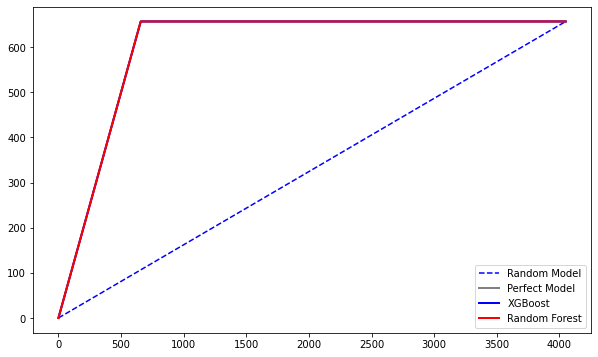

In [39]:
#Training Set
total = len(y_train) 
  
# Counting '1' labels in test data 
one_count = np.sum(y_train) 
  
# counting '0' lables in test data  
zero_count = total - one_count 
  
plt.figure(figsize = (10, 6)) 
  
# x-axis ranges from 0 to total number of data
# y-axis ranges from 0 to the total defaulters. 
  
plt.plot([0, total], [0, one_count], c = 'b',  
         linestyle = '--', label = 'Random Model') 


plt.plot([0, one_count, total], [0, one_count, one_count], 
         c = 'grey', linewidth = 2, label = 'Perfect Model') 

lm = [y for _, y in sorted(zip(predict_train_xgb, y_train), reverse = True)] 
x = np.arange(0, total + 1) 
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'b', label = 'XGBoost', linewidth = 2) 

lm = [y for _, y in sorted(zip(predict_train_rf, y_train), reverse = True)] 
x = np.arange(0, total + 1) 
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'red', label = 'Random Forest', linewidth = 2) 

plt.legend() 

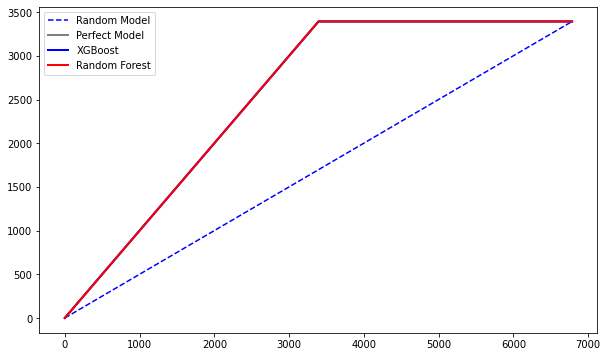

In [40]:
#Training Set
total = len(y_train_bal) 
  
# Counting '1' labels in test data 
one_count = np.sum(y_train_bal) 
  
# counting '0' lables in test data  
zero_count = total - one_count 
  
plt.figure(figsize = (10, 6)) 
  
# x-axis ranges from 0 to total number of data
# y-axis ranges from 0 to the total defaulters. 
  
plt.plot([0, total], [0, one_count], c = 'b',  
         linestyle = '--', label = 'Random Model') 


plt.plot([0, one_count, total], [0, one_count, one_count], 
         c = 'grey', linewidth = 2, label = 'Perfect Model') 

lm = [y for _, y in sorted(zip(predict_train_bal_xgb, y_train_bal), reverse = True)] 
x = np.arange(0, total + 1) 
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'b', label = 'XGBoost', linewidth = 2) 

lm = [y for _, y in sorted(zip(predict_train_bal_rf, y_train_bal), reverse = True)] 
x = np.arange(0, total + 1) 
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'red', label = 'Random Forest', linewidth = 2) 

plt.legend() 



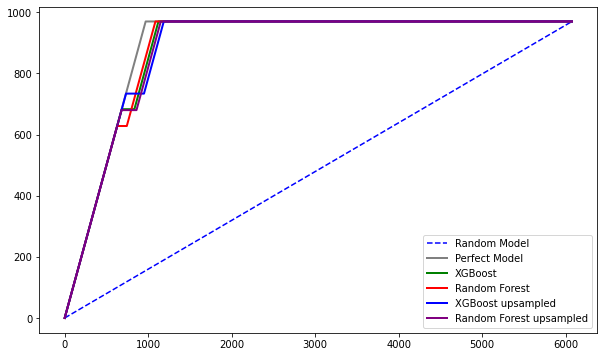

In [41]:
#Training Set
total = len(y_val) 
  
# Counting '1' labels in test data 
one_count = np.sum(y_val) 
  
# counting '0' lables in test data  
zero_count = total - one_count 
  
plt.figure(figsize = (10, 6)) 
  
# x-axis ranges from 0 to total number of data
# y-axis ranges from 0 to the total defaulters. 
  
plt.plot([0, total], [0, one_count], c = 'b',  
         linestyle = '--', label = 'Random Model') 


plt.plot([0, one_count, total], [0, one_count, one_count], 
         c = 'grey', linewidth = 2, label = 'Perfect Model') 

lm = [y for _, y in sorted(zip(predict_val_xgb, y_val), reverse = True)] 
x = np.arange(0, total + 1) 
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'green', label = 'XGBoost', linewidth = 2) 

lm = [y for _, y in sorted(zip(predict_val_rf, y_val), reverse = True)] 
x = np.arange(0, total + 1) 
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'red', label = 'Random Forest', linewidth = 2) 

lm = [y for _, y in sorted(zip(predict_val_bal_xgb, y_val), reverse = True)] 
x = np.arange(0, total + 1) 
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'blue', label = 'XGBoost upsampled', linewidth = 2) 

lm = [y for _, y in sorted(zip(predict_val_bal_rf, y_val), reverse = True)] 
x = np.arange(0, total + 1) 
y = np.append([0], np.cumsum(lm)) 
plt.plot(x, y, c = 'purple', label = 'Random Forest upsampled', linewidth = 2) 

plt.legend() 
